In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# read in data
data = pd.read_csv("../data/hcvdat0.csv", dtype={"Category":str})
# drop second index column
data.drop(labels="Unnamed: 0", axis="columns", inplace=True)

## Exploration

In [99]:
data.head(2)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']


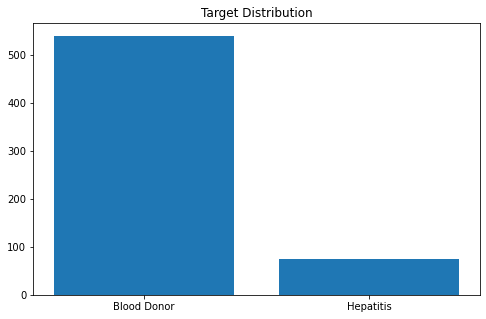

In [6]:
# binarize category data
print(data["Category"].unique().tolist())
binarized_category_dict = {"0=Blood Donor":0, "0s=suspect Blood Donor":0, "1=Hepatitis":1, "2=Fibrosis":1, "3=Cirrhosis":1}
data["Category"] = data["Category"].map(binarized_category_dict)
# save binarized for future model building
data.to_csv("../data/binarized_data.csv", index=False)
# visualize binarized target data
plt.figure(figsize=(8,5))
plt.bar(["Blood Donor", "Hepatitis"], list(data["Category"].value_counts()))
plt.title("Target Distribution")
plt.show()

### ALB Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['614.00', '41.62', '5.78', '14.90', '38.80', '41.95', '45.20', '82.20']
Don Subset: ['540.00', '42.01', '5.51', '14.90', '39.10', '42.10', '45.32', '82.20']
Hep Subset: ['74.00', '38.80', '6.88', '20.00', '34.25', '39.50', '44.00', '50.00']


/Users/klawal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/klawal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


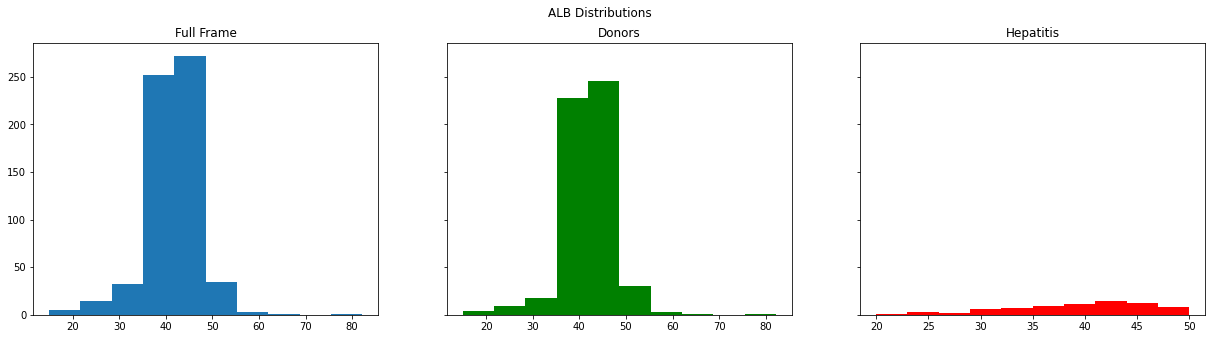

In [102]:
# copy frame for ALB analysis
albframe = data.copy(deep=True)
# subset alb based on target value
albdon = albframe.loc[frame["Category"] == 0]
albhep = albframe.loc[frame["Category"] == 1]
# view alb distribution information
print("           ", list(frame["ALB"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(albframe["ALB"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(albdon["ALB"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(albhep["ALB"].describe())])
# visualize alb plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('ALB Distributions')
ax1.hist(albframe["ALB"])
ax1.title.set_text("Full Frame")
ax2.hist(albdon["ALB"], color="green")
ax2.title.set_text("Donors")
ax3.hist(albhep["ALB"], color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Blood Donors have a few more outliers for ALB.  It also seems like Hepatitis C carriers have more uniformly distributed ALB

### ALP Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['597.00', '68.28', '26.03', '11.30', '52.50', '66.20', '80.10', '416.60']
Don Subset: ['540.00', '68.87', '19.45', '27.00', '55.30', '66.95', '80.12', '208.20']
Hep Subset: ['57.00', '62.73', '59.44', '11.30', '34.40', '41.60', '79.00', '416.60']


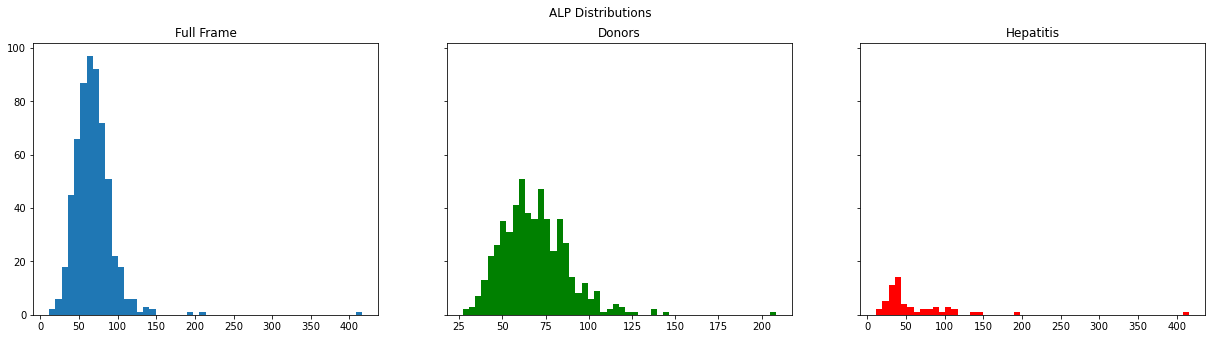

In [103]:
# copy frame for ALB analysis
alpframe = data.copy(deep=True)
# subsetbased on target value
alpdon = frame.loc[frame["Category"] == 0]
alphep = frame.loc[frame["Category"] == 1]
# view alp distribution information
print("           ", list(alpframe["ALP"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(alpframe["ALP"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(alpdon["ALP"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(alphep["ALP"].describe())])
# visualize alb plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('ALP Distributions')
ax1.hist(alpframe["ALP"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(alpdon["ALP"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(alphep["ALP"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: There is a higher degree of variability for ALP amongst Hepatitis C carriers

### AST Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['615.00', '34.79', '33.09', '10.60', '21.60', '25.90', '32.90', '324.00']
Don Subset: ['540.00', '27.13', '12.97', '10.60', '21.17', '24.90', '29.92', '188.70']
Hep Subset: ['75.00', '89.95', '65.94', '16.70', '42.55', '68.90', '111.65', '324.00']


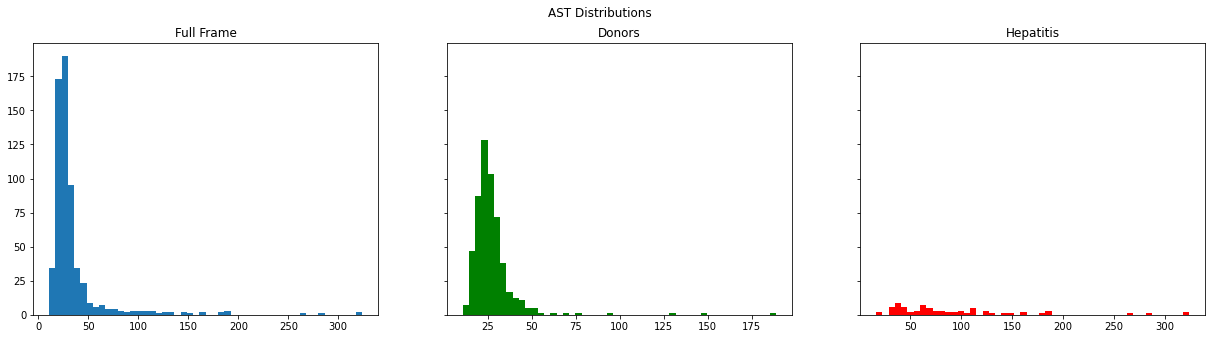

In [101]:
# copy frame for AST analysis
astframe = data.copy(deep=True)
# subsetbased on target value
astdon = frame.loc[frame["Category"] == 0]
asthep = frame.loc[frame["Category"] == 1]
# view ast distribution information
print("           ", list(astframe["AST"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(astframe["AST"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(astdon["AST"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(asthep["AST"].describe())])
# visualize ast plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('AST Distributions')
ax1.hist(astframe["AST"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(astdon["AST"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(asthep["AST"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Similarly to ALP, there is a significantly higher degree of variability for AST amongst Hepatitis C carriers

### ALT Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['614.00', '28.45', '25.47', '0.90', '16.40', '23.00', '33.08', '325.30']
Don Subset: ['540.00', '27.61', '20.99', '2.50', '17.20', '23.15', '32.60', '325.30']
Hep Subset: ['74.00', '34.59', '46.39', '0.90', '6.18', '14.95', '41.17', '258.00']


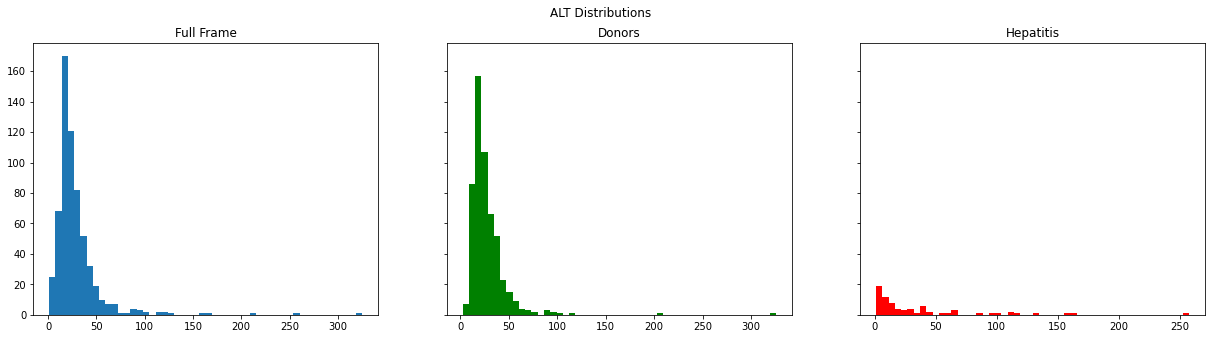

In [105]:
# copy frame for ALT analysis
altframe = data.copy(deep=True)
# subsetbased on target value
altdon = frame.loc[frame["Category"] == 0]
althep = frame.loc[frame["Category"] == 1]
# view ast distribution information
print("           ", list(astframe["ALP"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(altframe["ALT"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(altdon["ALT"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(althep["ALT"].describe())])
# visualize alt plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('ALT Distributions')
ax1.hist(altframe["ALT"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(altdon["ALT"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(althep["ALT"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Both Blood Donors and Hepatitis C carriers have a decent number of outliers.

### BIL Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['615.00', '11.40', '19.67', '0.80', '5.30', '7.30', '11.20', '254.00']
Don Subset: ['540.00', '8.48', '6.07', '0.80', '4.97', '6.90', '10.03', '59.10']
Hep Subset: ['75.00', '32.41', '49.32', '5.00', '10.50', '14.00', '27.00', '254.00']


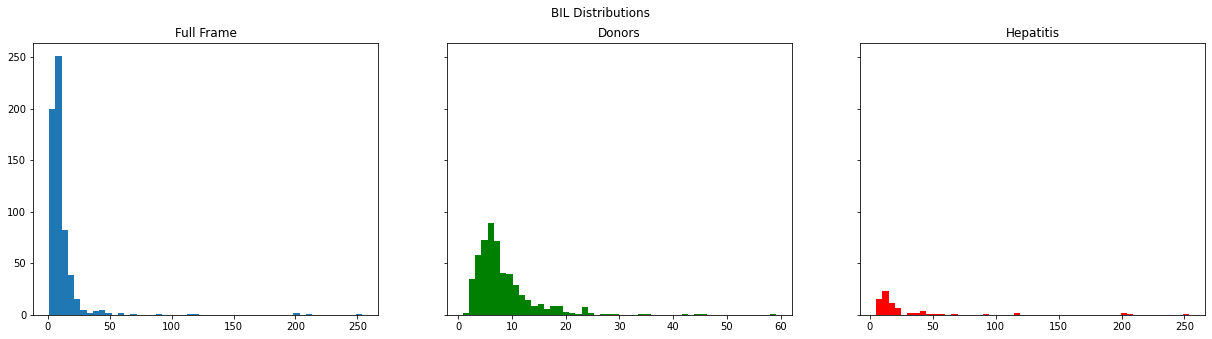

In [111]:
# copy frame for BIL analysis
bilframe = data.copy(deep=True)
# subsetbased on target value
bildon = frame.loc[frame["Category"] == 0]
bilhep = frame.loc[frame["Category"] == 1]
# view bil distribution information
print("           ", list(bilframe["BIL"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(bilframe["BIL"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(bildon["BIL"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(bilhep["BIL"].describe())])
# visualize bil plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('BIL Distributions')
ax1.hist(bilframe["BIL"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(bildon["BIL"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(bilhep["BIL"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Mean BIL is 282% higher for Hepatitis C carriers.  An indicator variable based on BIL could be useful if it can be constructed in a way that doesn't result in a near zero variance feature.  

### CHE Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['615.00', '8.20', '2.21', '1.42', '6.94', '8.26', '9.59', '16.41']
Don Subset: ['540.00', '8.39', '1.93', '3.44', '7.08', '8.32', '9.62', '15.43']
Hep Subset: ['75.00', '6.83', '3.31', '1.42', '4.00', '7.10', '9.34', '16.41']


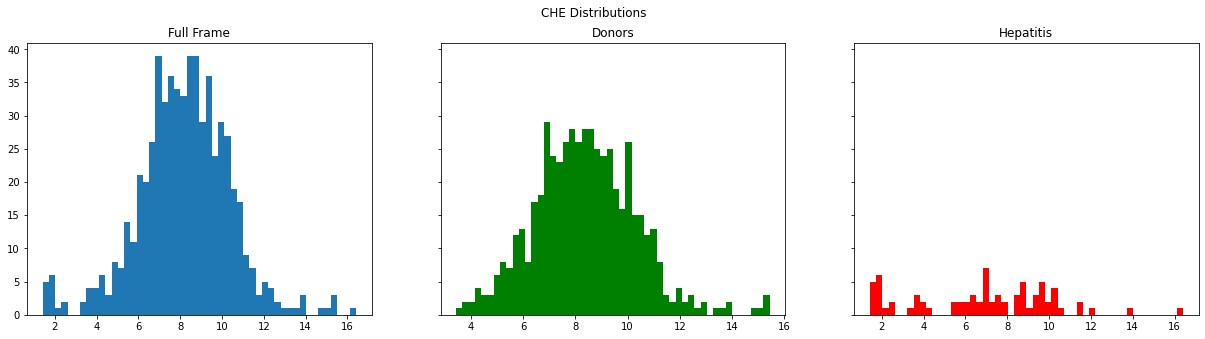

In [113]:
# copy frame for CHE analysis
cheframe = data.copy(deep=True)
# subsetbased on target value
chedon = frame.loc[frame["Category"] == 0]
chehep = frame.loc[frame["Category"] == 1]
# view che distribution information
print("           ", list(cheframe["CHE"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(cheframe["CHE"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(chedon["CHE"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(chehep["CHE"].describe())])
# visualize che plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('CHE Distributions')
ax1.hist(cheframe["CHE"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(chedon["CHE"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(chehep["CHE"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Both Blood Donors and Hepatitis C carriers follow roughly the same distribution for CHE.

### CHOL Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['605.00', '5.37', '1.13', '1.43', '4.61', '5.30', '6.06', '9.67']
Don Subset: ['533.00', '5.48', '1.08', '2.61', '4.69', '5.38', '6.17', '9.43']
Hep Subset: ['72.00', '4.54', '1.19', '1.43', '3.76', '4.38', '5.25', '9.67']


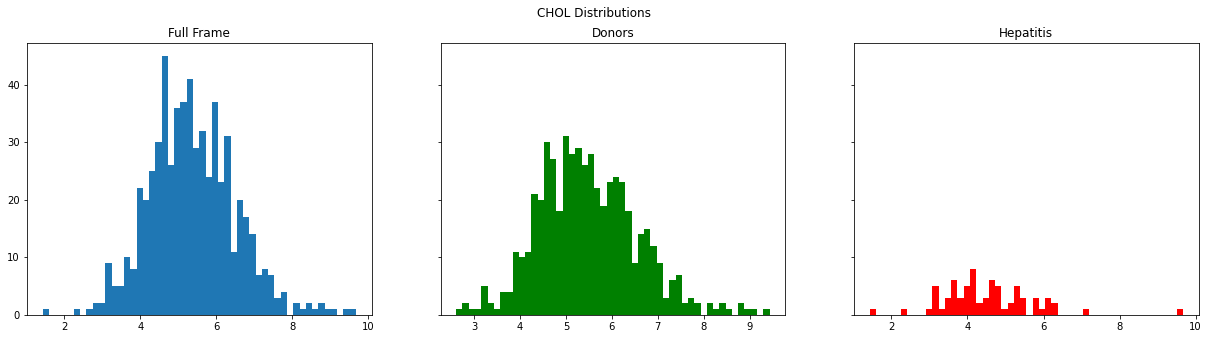

In [114]:
# copy frame for CHOL analysis
cholframe = data.copy(deep=True)
# subsetbased on target value
choldon = frame.loc[frame["Category"] == 0]
cholhep = frame.loc[frame["Category"] == 1]
# view chol distribution information
print("           ", list(cholframe["CHOL"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(cholframe["CHOL"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(choldon["CHOL"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(cholhep["CHOL"].describe())])
# visualize chol plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('CHOL Distributions')
ax1.hist(cholframe["CHOL"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(choldon["CHOL"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(cholhep["CHOL"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Both Blood Donors and Hepatitis C carriers follow roughly the same distribution for CHOL.

### CREA Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['615.00', '81.29', '49.76', '8.00', '67.00', '77.00', '88.00', '1079.10']
Don Subset: ['540.00', '78.75', '15.58', '8.00', '68.00', '78.00', '89.00', '170.00']
Hep Subset: ['75.00', '99.53', '135.61', '45.40', '61.45', '70.90', '81.05', '1079.10']


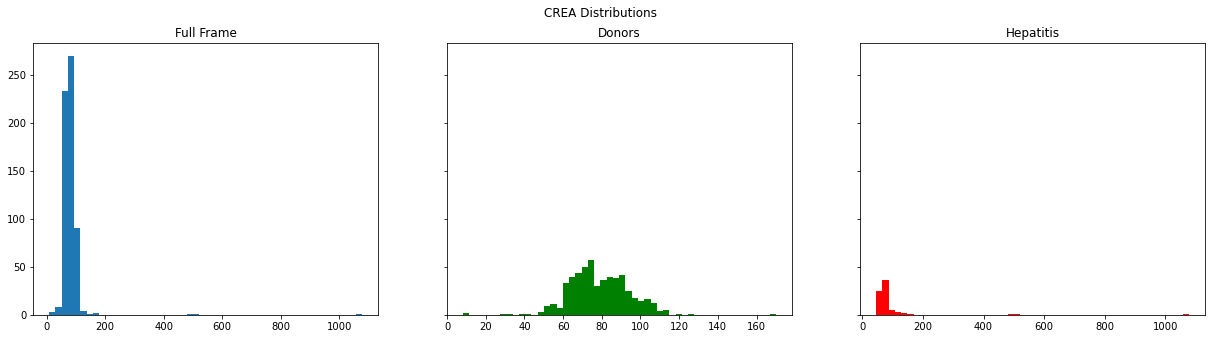

In [116]:
# copy frame for CREA analysis
creaframe = data.copy(deep=True)
# subsetbased on target value
creadon = frame.loc[frame["Category"] == 0]
creahep = frame.loc[frame["Category"] == 1]
# view crea distribution information
print("           ", list(creaframe["CREA"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(creaframe["CREA"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(creadon["CREA"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(creahep["CREA"].describe())])
# visualize crea plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('CREA Distributions')
ax1.hist(creaframe["CREA"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(creadon["CREA"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(creahep["CREA"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Hepatitis C carriers have a significanlty higher mean and variance for CREA.

### GGT Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['615.00', '39.53', '54.66', '4.50', '15.70', '23.30', '40.20', '650.90']
Don Subset: ['540.00', '30.62', '31.56', '4.50', '15.10', '21.50', '32.35', '345.60']
Hep Subset: ['75.00', '103.68', '113.09', '11.50', '40.15', '65.60', '119.65', '650.90']


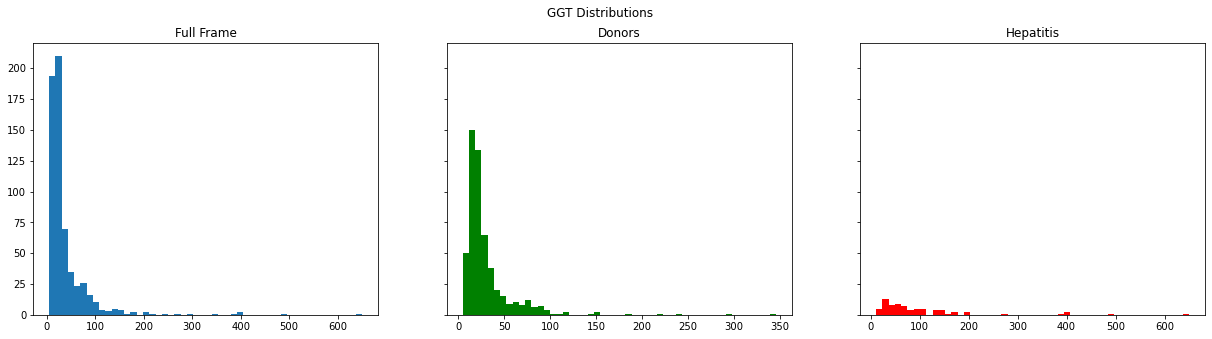

In [117]:
# copy frame for GGT analysis
ggtframe = data.copy(deep=True)
# subsetbased on target value
ggtdon = frame.loc[frame["Category"] == 0]
ggthep = frame.loc[frame["Category"] == 1]
# view ggt distribution information
print("           ", list(ggtframe["GGT"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(ggtframe["GGT"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(ggtdon["GGT"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(ggthep["GGT"].describe())])
# visualize ggt plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('GGT Distributions')
ax1.hist(ggtframe["GGT"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(ggtdon["GGT"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(ggthep["GGT"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Hepatitis C carriers have a significanlty higher mean and variance for GGT.

### PROT Analysis

            ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
Full Frame: ['614.00', '72.04', '5.40', '44.80', '69.30', '72.20', '75.40', '90.00']
Don Subset: ['540.00', '71.88', '5.12', '44.80', '69.30', '72.10', '75.12', '86.50']
Hep Subset: ['74.00', '73.28', '7.06', '54.20', '69.93', '72.90', '78.18', '90.00']


/Users/klawal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/klawal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


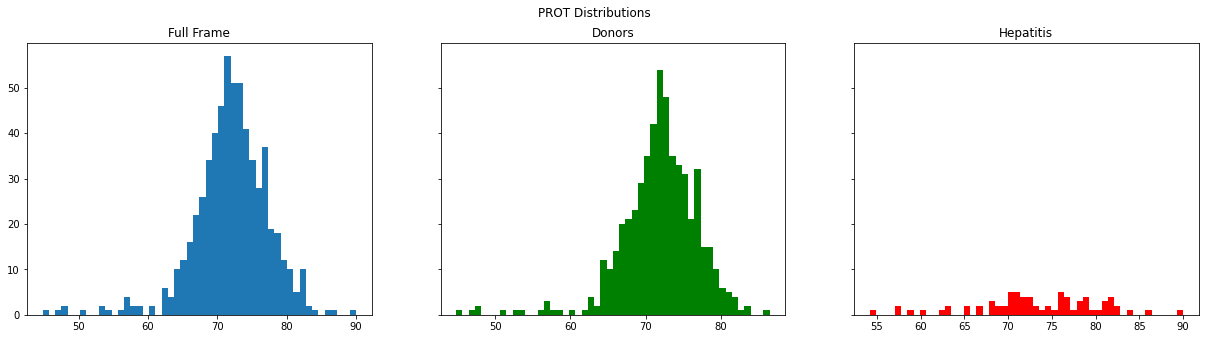

In [122]:
# copy frame for PROT analysis
protframe = data.copy(deep=True)
# subsetbased on target value
protdon = frame.loc[frame["Category"] == 0]
prothep = frame.loc[frame["Category"] == 1]
# view prot distribution information
print("           ", list(protframe["PROT"].describe().index))
print("Full Frame:", ['%.2f' % elem for elem in list(protframe["PROT"].describe())])
print("Don Subset:", ['%.2f' % elem for elem in list(protdon["PROT"].describe())])
print("Hep Subset:", ['%.2f' % elem for elem in list(prothep["PROT"].describe())])
# visualize prot plots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', gridspec_kw={'hspace': .2, 'wspace': .2}, figsize=(21,5))
(ax1, ax2, ax3) = axs
fig.suptitle('PROT Distributions')
ax1.hist(protframe["PROT"], bins=50)
ax1.title.set_text("Full Frame")
ax2.hist(protdon["PROT"], bins=50, color="green")
ax2.title.set_text("Donors")
ax3.hist(prothep["PROT"], bins=50, color="red")
ax3.title.set_text("Hepatitis")
plt.show()

Conclusion: Both Blood Donors and Hepatitis C carriers follow roughly the same distribution for PROT.